# MACHINE LEARNING LAB - BCSE209P
# Assessment 1
## Submitted by - Ishanvi Kotha (21BCE2712)
-------------------------------------------
### Question 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [2]:
data = pd.read_csv("COVID-19_Daily_Testing.csv")
data.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,...,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,...,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,...,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,...,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,...,1,8,7,0,2,0,1,2,1,9


In [3]:
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')

In [4]:
data['Cases'] = pd.to_numeric(data['Cases'])
data['Tests'] = pd.to_numeric(data['Tests'])

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     int64 
 3   Cases                                         89 non-null     int64 
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

In [6]:
print(data.describe())

            Tests        Cases  People Tested - Age 0-17  \
count    89.00000    89.000000                 89.000000   
mean   2165.47191   499.955056                111.011236   
std    1735.84995   365.764266                109.086652   
min       1.00000     0.000000                  0.000000   
25%     801.00000   169.000000                 25.000000   
50%    1645.00000   460.000000                 63.000000   
75%    3818.00000   768.000000                194.000000   
max    5971.00000  1285.000000                397.000000   

       People Tested - Age 40-49  People Tested - Age 50-59  \
count                  89.000000                  89.000000   
mean                  361.584270                 355.247191   
std                   281.190925                 275.699288   
min                     0.000000                   0.000000   
25%                   147.000000                 136.000000   
50%                   294.000000                 283.000000   
75%               

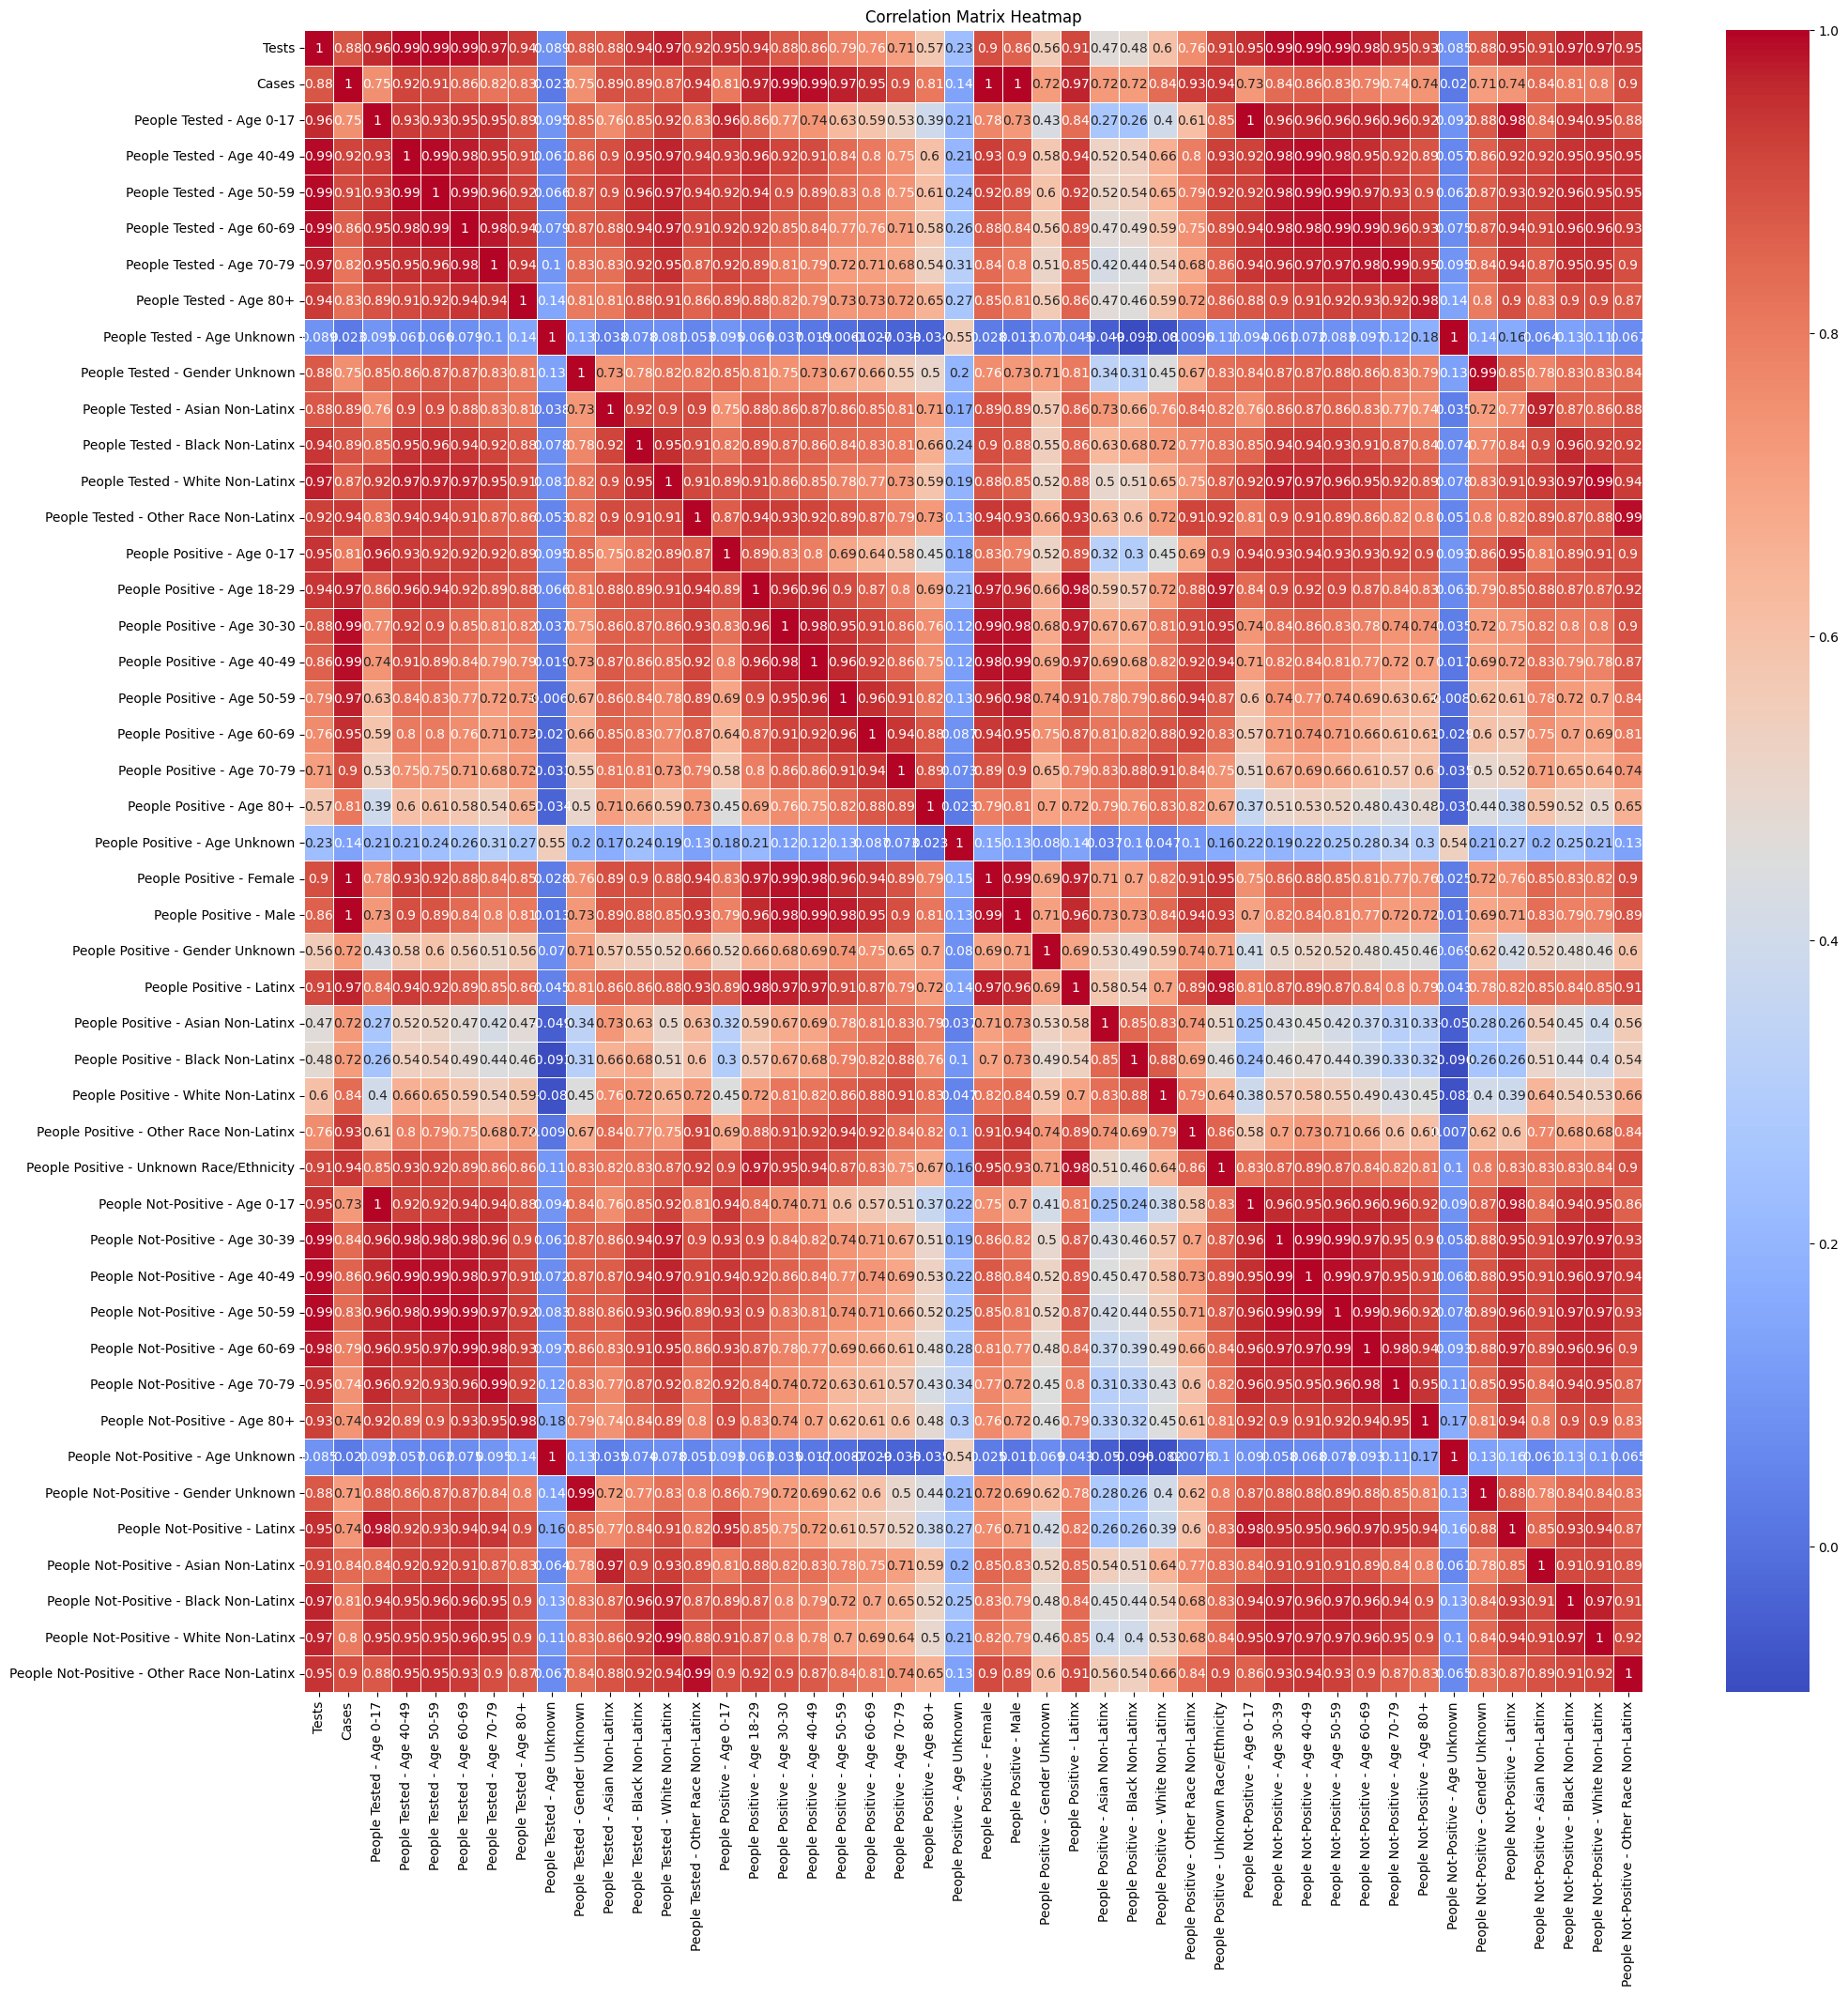

In [7]:
numeric_columns = data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(23, 23))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
predictions_train = reg.predict(X_train)
predictions_test = reg.predict(X_test)

In [12]:
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)

mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

In [13]:
print("Evaluation Metrics on Training Data:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R^2: {r2_train}")

print("\nEvaluation Metrics on Testing Data:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R^2: {r2_test}")

Evaluation Metrics on Training Data:
MAE: 127.39093467557664
MSE: 25563.562889295783
RMSE: 159.88609348312875
R^2: 0.7872388183107307

Evaluation Metrics on Testing Data:
MAE: 153.70229762001725
MSE: 35484.21742048692
RMSE: 188.37254954076224
R^2: 0.7596131599924819


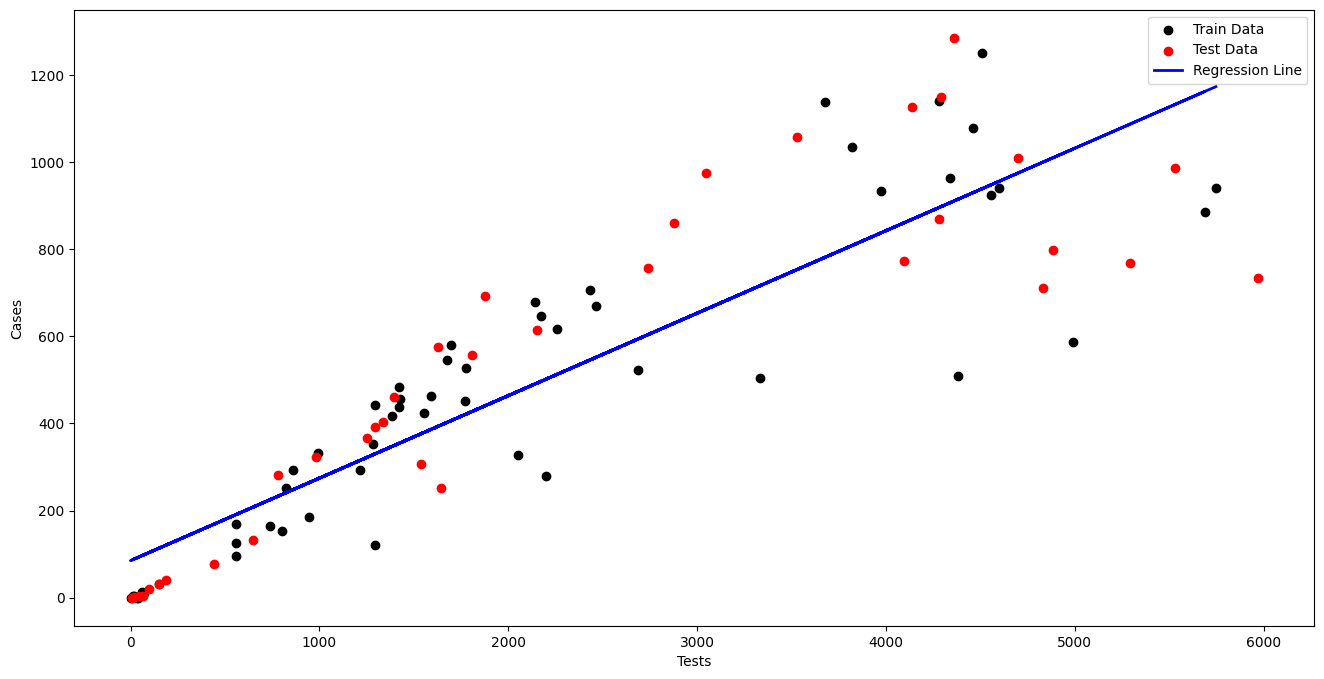

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, color='black', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, predictions_train, color='blue', linewidth=2, label='Regression Line')
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.legend()
plt.show()